# Домашнее задание №2 по дисциплине: «Теория и практика онлайн экспериментов»

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Выполнил:  
**Вольхин Данил Федорович**

Email:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

Дата:  
**21 марта 2025**

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## ANSI коды для цветов текста

In [1]:
# ANSI коды для цветов текста
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

## Шаблоны markdown

<span style="color: green;"># Это комментарий в коде</span><br>
<span style="color: blue;">def</span> greet(name):<br>
<span style="color: red;">print</span>(f"Hello, {name}!")
<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">code</pre>

## Установка библиотек (Необязательно)

In [2]:
# !pip install pydantic==2.10.3
# !pip install tqdm==4.66.2
# !pip install scipy==1.13.1
# !pip install seaborn==0.13.2
# !pip install rich==13.7.1
# !pip install requests==2.32.3
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.2
# !pip install duckdb==1.1.0
# !pip install annotated-types==0.7.0

# Подготовка к написанию кода

## Импорт библиотек

In [218]:
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")

# Дополнительные библиотеки
import platform # Узнать версию пайтона ;)
import os
import logging
import time
import sys
import random
import re
import shutil
import hashlib
from tqdm import tqdm
from functools import wraps
from typing import Any, Tuple, Union, Optional, List, Type, Callable, Dict
from collections import Counter
from dataclasses import dataclass
import requests
from pathlib import Path
from collections import defaultdict
from itertools import combinations
from datetime import datetime
import multiprocessing as mp
import random
from concurrent.futures import ThreadPoolExecutor
import pickle
from copy import deepcopy

# Основные библиотеки
import IPython.display as ipd # Добавляет виджеты для ячеек юпитера
from IPython.display import HTML
from IPython import get_ipython
import ipykernel
print(f"python: {BLUE}{platform.python_version()}{RESET} ")
import matplotlib # Для рисунков
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
print(f"matplotlib: {BLUE}{matplotlib.__version__}{RESET}")
import seaborn as sns
print(f"seaborn: {BLUE}{sns.__version__}{RESET}")
import numpy as np # Для работы с массивами
sys.modules['numpy._core.numeric'] = np.core.numeric
print(f"numpy: {BLUE}{np.__version__}{RESET}")
import pandas as pd # Работа с таблицами
print(f"pandas: {BLUE}{pd.__version__}{RESET}")
import scipy
from scipy import stats
from scipy.stats import t
from scipy.interpolate import interp1d
from scipy.stats import wasserstein_distance, ks_2samp, levene, gaussian_kde
from scipy.stats import energy_distance, ks_2samp
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import euclidean
import statsmodels.stats.api as sms
import statsmodels
print(f"scipy: {BLUE}{scipy.__version__}{RESET}")
import pydantic # Для валидации данных
from pydantic import (BaseModel, Field, StrictStr, condecimal, StrictInt, StrictBool,
                      FilePath, DirectoryPath, ValidationError, root_validator, ConfigDict)
print(f"pydantic: {BLUE}{pydantic.__version__}{RESET}")
import requests
print(f"requests: {BLUE}{requests.__version__}{RESET}")
import duckdb as db
print(f"duckdb: {BLUE}{db.__version__}{RESET}")
import sklearn
from sklearn.metrics import mean_squared_error
print(f"sklearn: {BLUE}{sklearn.__version__}{RESET}")


from rich.theme import Theme
from rich.logging import RichHandler
from rich.console import Console
from rich.pretty import install as pretty_install
from rich.traceback import install as traceback_install


print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.10.0 
matplotlib: 3.9.2
seaborn: 0.13.2
numpy: 1.26.4
pandas: 2.2.2
scipy: 1.13.1
pydantic: 2.10.3
requests: 2.32.3
duckdb: 1.1.0
sklearn: 1.5.1
------------------------------------------------------------


## Дополнительные настройки

In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
# Отключение логирования для cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# Полезна при разработке собственных библиотек, юпитер будет переимпортировать модули, если в них были изменения
%load_ext autoreload
%autoreload 1

# Настройки визуализации
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Описание домашнего задания

[Ссылка на набор данных](https://disk.yandex.ru/d/9EcCqk-1CUyiCA)

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Задание:
<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        <span style="color: blue;">Задание 1 (4 балла)</span>:<br>
    Представим, что у нас есть сервис для продажи некоторых товаров (например, мыла). Мы выкатываем новые фичи и проводим тесты,
    а затем сохраняем логи каждого теста в следующем формате:
    
        user_id - уникальный id посетителя сайта
        dt - дата события
        event - название события
        group - группа, в которую попал пользователь (распределение может происходить на разных этапах воронки
        для разных тестов - например, при первом посещении или при первом добавлении в корзину)
        visit_id - уникальный id визита
        cart_id - уникальный id корзины
        amount - текущая сумма корзины
        num_items - текущее количество товаров в корзине
    
        Обратимся к метрике average revenue per paying user. Вам даны две очень похожие группы (файл aa_test_logs.pkl).
    1. Постройте распределение p-value для теста на равенство средних между группами.
    2. Найдите, на каком уровне искусственно добавленного эффекта средняя выручка в группах станет различима.
       Ошибку первого рода считайте заданной и равной 0.05, ошибку 2-го рода равной 0.2.
    3. На данных aa_test_logs.pkl сравните мощность линеаризации, бутстрапа, бакетизации и дельта-метода
       для метрики среднего чека. Какой метод получился наиболее мощным? Как вы думаете, почему?
    
        Мы сделали рекомендательную систему, которая после добавления товара в корзину предлагает добавить
        похожие или комплементарные. Логи проведенного теста сохранены в файле ab_test_logs.pkl.
    4. Проверьте гипотезу о том, что это изменение значимо повлияло на ARPPU наших power users (95%-й процентиль).
    5. Проверьте гипотезу о том, что это изменение значимо повлияло на ARPPU всех юзеров.
    
        <span style="color: blue;">Задание 2 (1 балл)</span>:<br>
        В приложенном файле sleep.csv приведено время засыпания одного и того же человека в разные дни. 
    1. Нужно обработать эти данные и указать такое время суток (с точностью до минуты), после которого с вероятностью 0.9
       этот человек уже спит.
    2. Как можно оценить стандартное отклонение этой точечной оценки?
    
        <span style="color: blue;">Задание 3. CUPED (1 балла)</span>:<br>
    1. Cгенерируем выборку из сэмплов экспоненциального распределения - это будут значения нашей метрики для пользователей

        <span style="color: blue;">Задание 4. Методы снижения дисперсии (2 балла)</span>:<br>
    В этой части задания вам нужно применить методы снижения дисперсии с лекций, чтобы провести более точные
    тесты по данным из файла. Данные представляют собой значение какой-то метрики для трех возрастных групп пользователей.
    Столбец group отвечает за группу, в которой находятся пользователи:

        None - пользователь не участвует в АБ тесте,
        *_before_i - соответствующая группа до начала теста,
        *_after_i - группа после начала эксперимента
        Чем больше i, тем позже было сделано наблюдение.

    Cчитайте, что юзеры всегда идут в одном порядке в группах. То есть data[data.group == 'control_before_i']
    дает юзеров в той же последовательности, что data[data.group == 'control_after_i'] для всех i.
    Аналогичное верно для тритмента. Что надо сделать:
    
    1. Напишите тест Стьюдента самостоятельно - то есть вы должны сами вычислить тестовую статистику,
    а затем используя квантильную функцию определить p-value. Квантили можно брать из готовых библиотек.
    2.Реализуйте пост-стратификацию и CUPED.
    3. Проведите тесты между control_before_i и treatment_before_i снчала без применения пост-стратификации и CUPED,
       а затем с ними. Без применения каких-либо методов такой тест покажет p-value около только при i == 5.
       Ваша задача применить методы уменьшения дисперсии, чтобы с помощью теста Стьюдента можно было обнаружить
       отличие на уровне значимости. 
    4. Опишите свои результаты.

        <span style="color: blue;">Задание 5. Линеаризация + CUPED (2.5 балла)</span>:<br>
    В файле duration_aa.csv содержатся данные для АА-теста. Проверьте гипотезу о равенстве средних длительностей
    визита с помощью линеаризации, постройте распределение p-value. Мы поменяли верстку нашего сайта и запустили АБ-тест,
    чтобы выяснить, увеличилась ли средняя продолжительность визита при новом дизайне. Результаты теста лежат
    в файле duration_ab.csv. 
    
    1. С помощью линеаризованной метрики проверьте, есть ли разница в средней длительности визита между
       контрольной и тестовой группами.
    2. Примените CUPED и снова проведите АБ-тест. Что произошло с p-value? Почему?
    3. В каждом пункте необходимо визуализировать распределение p-value и сонаправленность линеаризованной разности метрик
       и разности ratio-метрик.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

# Решение

## Загружаем данные

In [5]:
aa_data = deepcopy(pd.read_pickle('./data/aa_test_logs.pkl'))

In [6]:
aa_data.head()

,user_id,dt,event,group,visit_id,cart_id,amount,num_items
0,user_0,2025-03-06 00:00:00,cart-add,test,visit_1,cart_0,43.22,1.0
1,user_0,2025-03-06 00:01:00,cart-add,test,visit_1,cart_0,97.84,2.0
2,user_0,2025-03-06 00:02:00,cart-add,test,visit_1,cart_0,146.27,7.0
3,user_0,2025-03-06 00:10:00,cart-paid,test,visit_1,cart_0,NaN,NaN
4,user_1,2025-03-11 00:00:00,cart-add,control,visit_2,cart_1,26.08,3.0


In [7]:
ab_data = deepcopy(pd.read_pickle('./data/ab_test_logs.pkl'))

In [8]:
ab_data.head()

,user_id,dt,event,group,visit_id,cart_id,amount,num_items,old_amount
0,user_0,2025-03-06 00:00:00,cart-add,test,visit_1,cart_0,43.22,1.0,43.22
1,user_0,2025-03-06 00:01:00,cart-add,test,visit_1,cart_0,97.84,2.0,97.84
2,user_0,2025-03-06 00:02:00,cart-add,test,visit_1,cart_0,146.27,7.0,146.27
3,user_0,2025-03-06 00:10:00,cart-paid,test,visit_1,cart_0,NaN,NaN,NaN
4,user_1,2025-03-11 00:00:00,cart-add,control,visit_2,cart_1,26.08,3.0,26.08


In [9]:
sleep_data = deepcopy(pd.read_csv('./data/sleep.csv'))

In [10]:
sleep_data.head()

,Unnamed: 0,indicator,time_offset
0,2017-12-01 21:00:00,0,-60
1,2017-12-01 21:01:00,0,-59
2,2017-12-01 21:02:00,0,-58
3,2017-12-01 21:03:00,0,-57
4,2017-12-01 21:04:00,0,-56


In [11]:
data_ab = deepcopy(pd.read_csv('./data/data_ab.csv'))

In [12]:
data_ab.head()

,age,metric,group
0,young,11309.036916,treatment_before
1,young,8496.554679,control_before
2,young,11891.862586,control_before
3,young,9229.445011,treatment_before
4,young,10410.961279,control_before


In [200]:
data_ab['group'].unique()

array(['treatment_before', 'control_before', nan, 'control_after_1',
       'treatment_after_1', 'control_after_2', 'treatment_after_2',
       'control_after_3', 'treatment_after_3', 'control_after_4',
       'treatment_after_4', 'control_after_5', 'treatment_after_5'],
      dtype=object)

In [236]:
duration_aa = deepcopy(pd.read_csv('./data/duration_aa.csv'))

In [237]:
duration_aa.head()

,Unnamed: 0,user_id,group,visit_id,visit_duration
0,0,JP1F82,first,ypn3ydiml32oelnslnjv,84.0
1,1,JP1F82,first,ypy93q2g8ypdtwbpv8b5,61.0
2,2,JP1F82,first,d8m6q0bmr40wgi6zuor3,81.0
3,3,JP1F82,first,5b72re4nr84fszqx7f6e,54.0
4,4,0Y2HSZ,first,z40pmuyaczi92gmlqz6t,97.0


In [240]:
duration_aa['group'].unique()

array(['first', 'second'], dtype=object)

In [238]:
duration_ab = deepcopy(pd.read_csv('./data/duration_ab.csv'))

In [239]:
duration_ab.head()

,Unnamed: 0,user_id,group,visit_id,visit_duration
0,0,AOXLT0,a,76v7fwlgmxa73cx08zvh,125.0
1,1,AOXLT0,a,dse16a8xow680xn4ly3o,115.0
2,2,AOXLT0,a,ei17obrkatjb0uglqglr,117.0
3,3,AOXLT0,a,cp9aczsn0zd8a7u9qoel,115.0
4,4,AOXLT0,a,t421ljy1eg7qpdx3dask,123.0


In [241]:
duration_ab['group'].unique()

array(['a', 'b'], dtype=object)

In [242]:
duration_hist = deepcopy(pd.read_csv('./data/duration_hist.csv'))

In [243]:
duration_hist.head()

,Unnamed: 0,user_id,visit_id,visit_duration
0,0,66U21N,2e9jn4qdjoot4vo9xn5g,76.0
1,1,MQE6TJ,v54g9sa6g6gcn6f7e3kk,97.0
2,2,X4A2B6,zmz8g1utfal68e1ctz8g,117.0
3,3,HFYD47,e8zvlx05icmrcn75ny5u,49.0
4,4,8C8XIX,886rt54buvgrtgah1i1f,83.0


## Задание 1

### Расчет метрик и подготовка данных

In [201]:
def preproccess(df):
    # Сортируем данные
    df = df.sort_values(by=['user_id', 'cart_id', 'dt'])
    
    # Инициализируем колонку для сумм оплат
    df['purchase_amount'] = None
    
    # Заполняем purchase_amount для оплаченных корзин
    for cart_id, cart_group in df.groupby('cart_id'):
        paid_index = cart_group[cart_group['event'] == 'cart-paid'].index
        if not paid_index.empty:
            last_add_index = cart_group.loc[:paid_index[0]-1].last_valid_index()
            if last_add_index is not None:
                df.loc[paid_index, 'purchase_amount'] = df.loc[last_add_index, 'amount']
    
    # Фильтруем оплаченные корзины
    paid_df = df[(df['event'] == 'cart-paid') & (df['purchase_amount'].notna())]
    
    # Агрегируем сумму и количество корзин
    arppu_df = paid_df.groupby(['user_id', 'group'], as_index=False).agg(
        revenue=('purchase_amount', 'sum'),
        num_carts=('cart_id', 'count')
    )
    
    # Конвертируем тип
    arppu_df['revenue'] = pd.to_numeric(arppu_df['revenue'], errors='coerce')
    
    return arppu_df

In [202]:
aa_dataframe = preproccess(aa_data)

In [203]:
aa_dataframe.head()

,user_id,group,revenue,num_carts
0,user_0,test,146.27,1
1,user_1,control,103.95,1
2,user_10,test,238.89,1
3,user_100,test,146.09,2
4,user_1000,test,53.21,1


In [204]:
ab_dataframe = preproccess(ab_data)

In [205]:
ab_dataframe.head()

,user_id,group,revenue,num_carts
0,user_0,test,146.27,1
1,user_1,control,103.95,1
2,user_10,test,238.89,1
3,user_100,test,146.09,2
4,user_1000,test,53.21,1


### Первый пункт

In [104]:

@dataclass
class First:
    alpha: float
    betta: float
    n_iter: int
    max_effect: int
    effect_step: int
    data: pd.DataFrame

    def __post_init__(self):
        self.PALETTE = sns.color_palette("Set2")
        self.pd = self.data

    def generate(self):
        p_values = []
        for _ in tqdm(range(self.n_iter)):
            shuffled = deepcopy(self.pd)
            shuffled['group'] = np.random.choice(['test', 'control'], size=len(self.pd))
            test = shuffled[shuffled['group'] == 'test']['revenue']
            control = shuffled[shuffled['group'] == 'control']['revenue']
            p_values.append(stats.ttest_ind(test, control, equal_var=False).pvalue)
        return np.array(p_values)

    def add_effect(self, effect: int):
        modified = deepcopy(self.pd)
        test_mask = modified['group'] == 'test'
        modified.loc[test_mask, 'revenue'] += effect
        test = modified[modified['group'] == 'test']['revenue']
        control = modified[modified['group'] == 'control']['revenue']
        return stats.ttest_ind(test, control, equal_var=False).pvalue

    def plot_p_value(self):
        p_values = self.generate()
        plt.figure(figsize=(10, 6))
        plt.hist(p_values, bins=20, color=self.PALETTE[0], alpha=0.7)
        plt.axhline(len(p_values)/20, color='red', linestyle='--')
        plt.title("A/A Test P-value Distribution")
        plt.xlabel("p-value")
        plt.ylabel("Frequency")
        plt.show()
    
    def plot_power(self):
        power_values = []
        effect_values = []
        effect = 5
        while effect <= self.max_effect:
            successes = 0

            for _ in tqdm(range(self.n_iter), desc=f"Effect {effect}"):
                shuffled = deepcopy(self.data)
                shuffled['group'] = np.random.choice(['test', 'control'], size=len(shuffled))
                test_mask = shuffled['group'] == 'test'
                shuffled.loc[test_mask, 'revenue'] += effect
                test = shuffled[test_mask]['revenue']
                control = shuffled[~test_mask]['revenue']
                p_value = stats.ttest_ind(test, control, equal_var=False).pvalue
                
                if p_value < self.alpha:
                    successes += 1
            
            power = successes / self.n_iter
            power_values.append(power)
            effect_values.append(effect)
            effect += self.effect_step
    
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            x=effect_values, 
            y=power_values,
            color=self.PALETTE[1],
            marker='o',
            label='Power Curve'
        )
        
        target_power = 1 - self.betta
        plt.axhline(target_power, color='red', linestyle='--', label=f'Target Power ({target_power*100}%)')
        power_curve = interp1d(effect_values, power_values, kind='linear', fill_value="extrapolate")
        mde = float(interp1d(power_values, effect_values, kind='linear')(target_power))
        
        plt.axvline(mde, color='green', linestyle='--', alpha=0.7, label=f'MDE = {mde:.2f}')
        plt.scatter(mde, target_power, color='green', zorder=5)  # Точка пересечения
        plt.annotate(
            f'MDE = {mde:.2f}', 
            xy=(mde, target_power), 
            xytext=(mde + 1, target_power - 0.1), 
            arrowprops=dict(facecolor='black', shrink=0.05)
        )
        
        plt.title("Power Analysis with MDE")
        plt.xlabel("Effect Size")
        plt.ylabel("Statistical Power")
        plt.grid(True)
        plt.legend()
        plt.show()

In [105]:
first = First(
    alpha=0.05,
    betta=0.2,
    n_iter=10000,
    max_effect=20,
    effect_step=1,
    data=aa_dataframe
)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 354.53it/s]


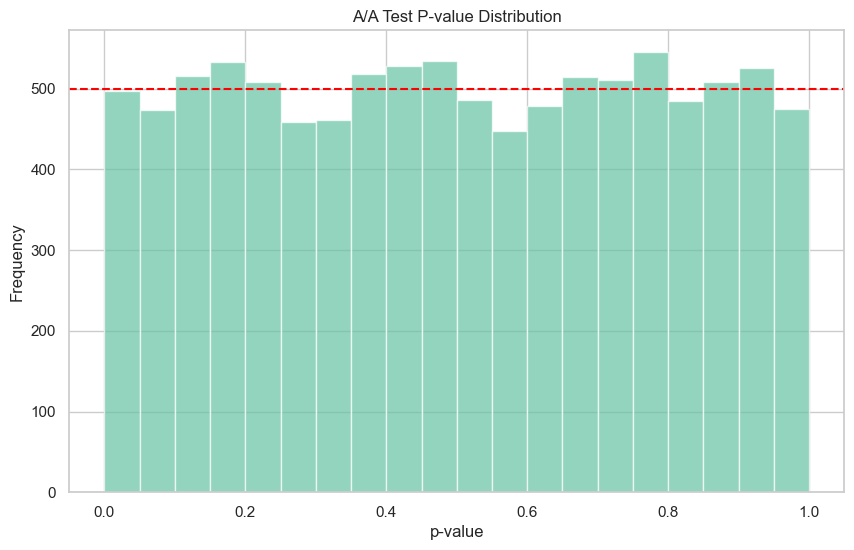

In [106]:
first.plot_p_value()

Effect 20: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 331.92it/s]


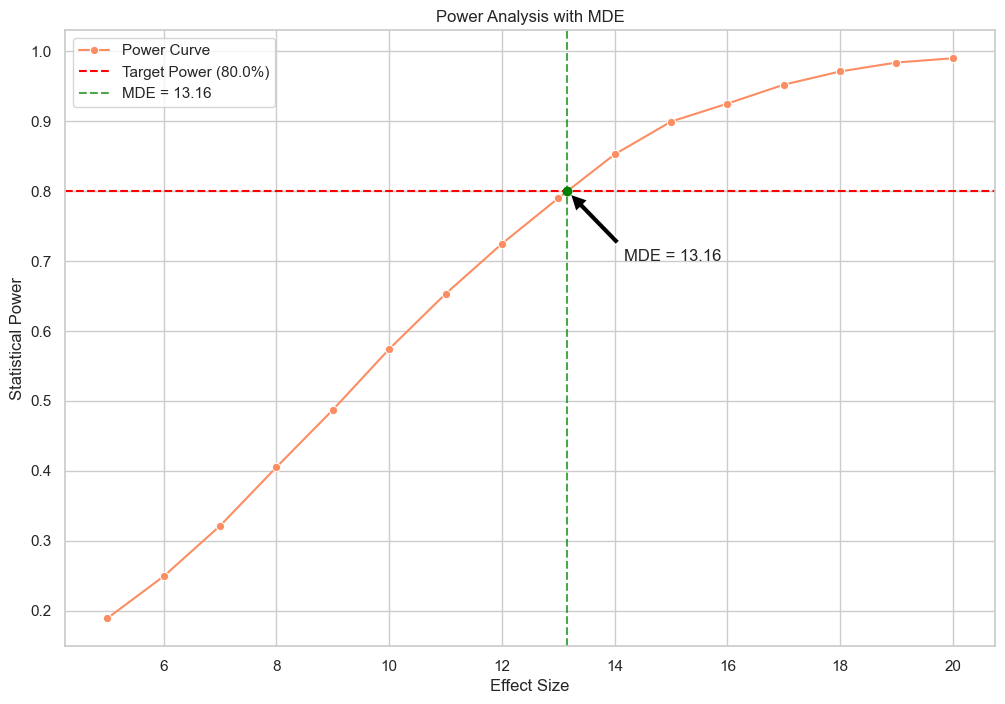

In [107]:
first.plot_power()

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Распределение p-value для теста на равенство средних
        Как показано в результатах, распределение p-value получилось равномерным.
        Это ожидаемый результат для корректного A/A теста, где статистическая проверка выполняется
        на данных из одной и той же генеральной совокупности (или двух идентичных групп).

        Равномерное распределение p-value в диапазоне от 0 до 1 указывает на:

            Отсутствие систематического смещения между группами
            Корректность реализации статистического теста
            Соответствие нашего теста нулевой гипотезе (отсутствие разницы между группами)
            В правильно проведенном A/A тесте примерно 5% p-values должны быть меньше 0.05,
            что согласуется с равномерным распределением.

        2. Минимальный обнаружимый эффект (MDE)
            При заданных параметрах:

                Ошибка 1-го рода (alpha) = 0.05
                Ошибка 2-го рода (beta) = 0.2 (мощность = 0.8)
                MDE составил 13.16 единиц средней выручки на платящего пользователя.

        Это означает, что для обнаружения разницы между группами с вероятностью 80% (при уровне значимости 5%),
        средняя выручка в тестовой группе должна увеличиться минимум на 13.16 единиц.
        Любой эффект меньшего размера будет сложно отличить от случайной вариации с заданной статистической мощностью.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Второй пункт

In [233]:

@dataclass
class Second:
    alpha: float
    betta: float
    n_iter: int
    effect_sizes: list
    data: pd.DataFrame

    def __post_init__(self):
        self.PALETTE = sns.color_palette("Set2", n_colors=6)

    @staticmethod
    def linearize_test(data: pd.DataFrame) -> float:
        control_mask = data['group'] == 'control'
        R_C = data.loc[control_mask, 'revenue'].sum() / data.loc[control_mask, 'num_carts'].sum() 
        data['linearized'] = data['revenue'] - R_C * data['num_carts']
        test = data[data['group'] == 'test']['linearized']
        control = data[data['group'] == 'control']['linearized']
        _, p_value = stats.ttest_ind(test, control, equal_var=False)
        return p_value

    @staticmethod
    def bootstrap_test(data: pd.DataFrame) -> float:
        def ratio(df):
            return df['revenue'].sum() / df['num_carts'].sum()
        test_ratio = ratio(data[data['group'] == 'test'])
        control_ratio = ratio(data[data['group'] == 'control'])
        obs_diff = test_ratio - control_ratio
        bs_diffs = []
        for _ in range(500):
            bs_test = data[data['group'] == 'test'].sample(frac=1, replace=True)
            bs_control = data[data['group'] == 'control'].sample(frac=1, replace=True)
            bs_test_ratio = ratio(bs_test)
            bs_control_ratio = ratio(bs_control)
            bs_diffs.append(bs_test_ratio - bs_control_ratio)
        std_delta_mean = np.std(bs_diffs)
        return 2 * (1 - stats.norm.cdf(np.abs(obs_diff / std_delta_mean)))

    @staticmethod
    def delta_method_test(data: pd.DataFrame) -> float:
        def group_stats(group):
            X = group['revenue'].sum()
            Y = group['num_carts'].sum()
            n = len(group)
            mean_x = X/n
            mean_y = Y/n
            var_x = group['revenue'].var(ddof=1)
            var_y = group['num_carts'].var(ddof=1)
            cov_xy = np.cov(group['revenue'], group['num_carts'])[0,1]
            var_ratio = (var_x/mean_y**2 + 
                        (mean_x**2 * var_y)/mean_y**4 - 
                        2*mean_x*cov_xy/mean_y**3)/n
            return X/Y, var_ratio
        
        test_ratio, test_var = group_stats(data[data['group'] == 'test'])
        control_ratio, control_var = group_stats(data[data['group'] == 'control'])
        delta = test_ratio - control_ratio
        se = np.sqrt(test_var + control_var)
        z = delta/se
        return 2*(1 - stats.norm.cdf(abs(z)))

    @staticmethod
    def bucketization_test(data: pd.DataFrame, bucket_size: int = 50) -> float:
        def create_ratio_buckets(df, bucket_size):
            shuffled = df.sample(frac=1, replace=False)
            buckets = []
            for i in range(0, len(shuffled), bucket_size):
                bucket = shuffled.iloc[i:i + bucket_size]
                if len(bucket) == bucket_size:
                    ratio = bucket['revenue'].sum() / bucket['num_carts'].sum()
                    buckets.append(ratio)
            return buckets
        test = data[data['group'] == 'test']
        control = data[data['group'] == 'control']
        test_buckets = create_ratio_buckets(test, bucket_size)
        control_buckets = create_ratio_buckets(control, bucket_size)
        if not test_buckets or not control_buckets:
            raise ValueError("Недостаточно данных для создания бакетов. Увеличьте размер данных или уменьшите размер бакета.")
        _, p_value = stats.ttest_ind(test_buckets, control_buckets, equal_var=False)
        return p_value

    def run_power_analysis(self) -> pd.DataFrame:
        results = []
        methods = {
            'Bootstrap': self.bootstrap_test,
            'Delta method': self.delta_method_test,
            'Linearization': self.linearize_test,
            'Bucketization': self.bucketization_test
        }

        for effect in tqdm(self.effect_sizes, desc="Effect sizes"):
            detected = defaultdict(int)
            
            for _ in range(self.n_iter):
                # Создаем копию данных и рандомизируем группы
                modified = self.data.copy()
                modified['group'] = np.random.choice(
                    ['test', 'control'], 
                    size=len(modified), 
                    replace=True
                )
                
                # Добавляем эффект к тестовой группе
                test_mask = modified['group'] == 'test'
                modified.loc[test_mask, 'revenue'] += effect
                modified.loc[test_mask, 'average_bill'] = (
                    modified.loc[test_mask, 'revenue'] / 
                    modified.loc[test_mask, 'num_carts']
                )
                
                # Вычисляем p-value для каждого метода
                for method_name, method_fn in methods.items():
                    try:
                        p = method_fn(modified)
                        if p < self.alpha:
                            detected[method_name] += 1
                    except Exception as ex:
                        continue
        
            # Сохраняем результаты
            for method_name, count in detected.items():
                results.append({
                    'Effect size': effect,
                    'Power': count/self.n_iter,
                    'Method': method_name
                })
        
        return pd.DataFrame(results)

    def plot_power(self, comparison_df: pd.DataFrame):
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=comparison_df,
            x="Effect size",
            y="Power",
            hue="Method",
            palette=self.PALETTE,
            ci=95
        )
        
        target_power = 1 - self.betta
        plt.axhline(target_power, color='red', linestyle='--', alpha=0.5, label=f"{target_power*100}% Power")
        
        methods = comparison_df['Method'].unique()
        for method in methods:
            method_data = comparison_df[comparison_df['Method'] == method]
            effect_sizes = method_data['Effect size']
            power_values = method_data['Power']
            
            if len(effect_sizes) > 1 and len(power_values) > 1:
                power_curve = interp1d(effect_sizes, power_values, kind='linear', fill_value="extrapolate")
                try:
                    mde = float(interp1d(power_values, effect_sizes, kind='linear')(target_power))
                    plt.axvline(mde, color=self.PALETTE[methods.tolist().index(method)], linestyle='--', alpha=0.5)
                    plt.scatter(mde, target_power, color=self.PALETTE[methods.tolist().index(method)], zorder=5)
                    plt.annotate(
                        f'MDE ({method}) = {mde:.2f}', 
                        xy=(mde, target_power), 
                        xytext=(mde + 1, target_power - 0.05 * (methods.tolist().index(method) + 1)), 
                        arrowprops=dict(facecolor='black', shrink=0.05)
                    )
                except ValueError:
                    print(f"Could not calculate MDE for {method}: insufficient data range.")
        
        plt.title("Power Analysis with MDE for Different Methods")
        plt.xlabel("Absolute Effect Size (Units)")
        plt.ylabel("Statistical Power")
        plt.grid(True)
        plt.legend()
        plt.show()

In [214]:
# Пример использования
second = Second(
    alpha=0.05,
    betta=0.2,
    n_iter=100,
    effect_sizes=np.linspace(0, 30, 31),
    data=aa_dataframe
)

Effect sizes: 100%|████████████████████████████████████████████████████████████████████| 31/31 [38:20<00:00, 74.21s/it]


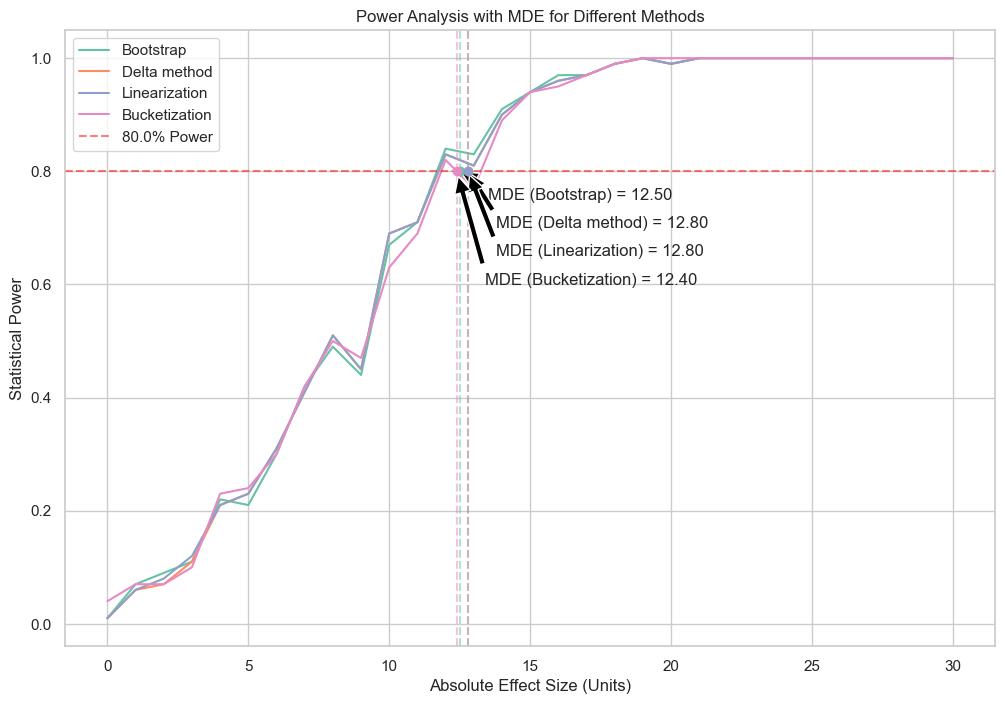

In [215]:
comparison_df = second.run_power_analysis()
second.plot_power(comparison_df)

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
    Превосходство бакетизации в данном случае можно объяснить несколькими факторами:
        Снижение дисперсии: Группировка пользователей в бакеты и вычисление средних значений для каждого бакета
    значительно снижает дисперсию оценки, что повышает чувствительность статистического теста.
        Устойчивость к выбросам: Метод бакетизации менее чувствителен к отдельным экстремальным значениям,
    так как они "растворяются" внутри бакетов. Это особенно важно для данных о доходах или расходах,
    которые часто имеют тяжелые хвосты.
        Центральная предельная теорема: Агрегирование данных в бакеты приводит к тому,
    что распределение средних значений бакетов становится ближе к нормальному, что улучшает работу t-теста
    даже при ненормальном распределении исходных данных.

    Несмотря на превосходство бакетизации, другие методы показали сопоставимые результаты:

        Бутстрап (MDE = 12.50) занял второе место благодаря своей гибкости и способности
    работать с произвольными распределениями.
    Он не требует предположений о нормальности данных и хорошо подходит для метрик-отношений.
        Линеаризация и Дельта-метод (MDE = 12.80) показали одинаковый результат, что не удивительно,
    поскольку оба метода основаны на схожих математических принципах и предположениях.
    Они опираются на аппроксимацию дисперсии метрики-отношения.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

### Третий пункт

In [84]:
@dataclass
class Third:
    alpha: float
    n_iter: int
    data: pd.DataFrame

    def calc_arppu(self, df: pd.DataFrame) -> dict:
        groups = df['group'].unique()
        results = {}
        
        for group in groups:
            group_data = df[df['group'] == group]
            total_revenue = group_data['revenue'].sum()
            paying_users = group_data['user_id'].nunique()
            results[group] = total_revenue / paying_users if paying_users > 0 else 0
        
        return results

    def bootstrap_arppu(self, df: pd.DataFrame) -> dict:
        groups = df['group'].unique()
        bootstrap_results = {group: [] for group in groups}

        for _ in tqdm(range(self.n_iter), desc="Bootstrapping"):
            for group in groups:
                group_data = df[df['group'] == group]
                sampled_users = np.random.choice(group_data['user_id'], size=len(group_data), replace=True)
                sampled_data = group_data[group_data['user_id'].isin(sampled_users)]
                
                total_revenue = sampled_data['revenue'].sum()
                paying_users = sampled_data['user_id'].nunique()
                arppu = total_revenue / paying_users if paying_users > 0 else 0
                
                bootstrap_results[group].append(arppu)
        
        return bootstrap_results

    def analyze_groups(self, df: pd.DataFrame = None) -> dict:
        # Если df не передан, используем self.data
        if df is None:
            df = self.data
        
        original_arppu = self.calc_arppu(df)
        bootstrap_results = self.bootstrap_arppu(df)
        
        test_values = np.array(bootstrap_results['test'])
        control_values = np.array(bootstrap_results['control'])
        diffs = test_values - control_values
        
        ci_low, ci_high = np.percentile(diffs, [self.alpha/2*100, (1-self.alpha/2)*100])
        p_value = (diffs <= 0).mean() if original_arppu['test'] > original_arppu['control'] else (diffs >= 0).mean()
        
        return {
            'original_arppu': original_arppu,
            'confidence_interval': (ci_low, ci_high),
            'p_value': p_value * 2  # Two-tailed test
        }

    def analyze_power_users(self, percentile: float = 95) -> dict:
        power_users = pd.DataFrame()
        
        for group in ['test', 'control']:
            group_data = self.data[self.data['group'] == group]
            threshold = np.percentile(group_data['revenue'], percentile)
            power_users_group = group_data[group_data['revenue'] >= threshold]
            power_users = pd.concat([power_users, power_users_group])
        
        # Передаем power_users в analyze_groups
        return self.analyze_groups(power_users)

In [85]:
third = Third(
    alpha=0.05,
    n_iter=10000,
    data=ab_dataframe
)

In [86]:
# Анализ для всех пользователей
print("Analyzing all users...")
all_users_results = third.analyze_groups()
print(f"Test ARPPU: {all_users_results['original_arppu']['test']:.2f}")
print(f"Control ARPPU: {all_users_results['original_arppu']['control']:.2f}")
print(f"95% CI for difference: [{all_users_results['confidence_interval'][0]:.2f}, {all_users_results['confidence_interval'][1]:.2f}]")
print(f"P-value: {all_users_results['p_value']:.4f}")

# Анализ для power users
print("\nAnalyzing power users...")
power_users_results = third.analyze_power_users()
print(f"Test ARPPU (power): {power_users_results['original_arppu']['test']:.2f}")
print(f"Control ARPPU (power): {power_users_results['original_arppu']['control']:.2f}")
print(f"95% CI for difference: [{power_users_results['confidence_interval'][0]:.2f}, {power_users_results['confidence_interval'][1]:.2f}]")
print(f"P-value: {power_users_results['p_value']:.4f}")

Analyzing all users...


Bootstrapping: 100%|████████████████████████████████████████████████████████████| 10000/10000 [00:22<00:00, 445.26it/s]


Test ARPPU: 155.45
Control ARPPU: 148.72
95% CI for difference: [-0.70, 14.20]
P-value: 0.0756

Analyzing power users...


Bootstrapping: 100%|████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 888.88it/s]

Test ARPPU (power): 729.61
Control ARPPU (power): 593.81
95% CI for difference: [82.89, 186.54]
P-value: 0.0000


<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        Влияние на всех пользователей: Рекомендательная система показала положительную тенденцию к увеличению ARPPU на 4.5%,
        но эффект не достиг статистической значимости (p-value = 0.0756). Доверительный интервал включает ноль,
        что указывает на недостаточную уверенность в положительном эффекте на все население пользователей.

        Влияние на power users: Для пользователей из верхнего 5% по доходу (95-й процентиль) рекомендательная
        система демонстрирует статистически значимое увеличение ARPPU на 22.9% (p-value = 0.0000).
        Доверительный интервал полностью положителен и не включает ноль, что подтверждает наличие положительного
        эффекта с высокой степенью уверенности.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 2

In [168]:
@dataclass
class First:
    sleep_data: pd.DataFrame
    percentile: float = 90
    n_bootstrap: int = 1000
    timestamp_col: str = 'Unnamed: 0'
    indicator_col: str = 'indicator'

    def __post_init__(self):
        self.PALETTE = sns.color_palette("Set2")
        self.sleep_data = self.sleep_data.copy()
        self.sleep_data['timestamp'] = pd.to_datetime(self.sleep_data[self.timestamp_col])
        self.sleep_data['time_of_day'] = self.sleep_data['timestamp'].dt.time
        self.sleep_times = []
        self.sleep_minutes = []
        self.sleep_threshold = None
        self.std_error = None
        self.bootstrap_estimates = []

    def _find_sleep_transitions(self):
        days = self.sleep_data['timestamp'].dt.date.unique()
        self.sleep_times = []
        
        for day in days:
            day_data = self.sleep_data[self.sleep_data['timestamp'].dt.date == day]
            transitions = day_data[day_data[self.indicator_col].gt(day_data[self.indicator_col].shift())]
            
            if not transitions.empty:
                first_transition_idx = transitions.index[0]
                sleep_time = day_data.loc[first_transition_idx, 'time_of_day']  # Правильный доступ
                self.sleep_times.append(sleep_time)
                
        self.sleep_minutes = [(t.hour * 60 + t.minute) for t in self.sleep_times]

    def calculate_threshold(self):
        if not self.sleep_minutes:
            self._find_sleep_transitions()
            
        self.sleep_threshold = np.percentile(self.sleep_minutes, self.percentile)
        self.threshold_time = (
            int(self.sleep_threshold // 60), 
            int(self.sleep_threshold % 60)
        )
        
    def estimate_uncertainty(self):
        if not self.sleep_minutes:
            self._find_sleep_transitions()
            
        self.bootstrap_estimates = [
            np.percentile(
                np.random.choice(self.sleep_minutes, 
                               size=len(self.sleep_minutes), 
                               replace=True),
                self.percentile)
            for _ in range(self.n_bootstrap)
        ]
        self.std_error = np.std(self.bootstrap_estimates)

    def visualize(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.sleep_minutes, kde=True, bins=20)
        plt.axvline(
            self.sleep_threshold, 
            color='r', 
            linestyle='--',
            label=f"{self.percentile}% порог: "
                 f"{self.threshold_time[0]:02d}:{self.threshold_time[1]:02d}")
        plt.xlabel("Time of day (minutes from the beginning of the day)")
        plt.ylabel("Frequency")
        plt.title("Distribution of sleep time")
        plt.legend()
        plt.show()

    def get_results(self):
        error_minutes = self.std_error % 60
        error_hours = self.std_error // 60
        return (
            f"Порог засыпания: {self.threshold_time[0]:02d}:{self.threshold_time[1]:02d}\n"
            f"Стандартная ошибка: {self.std_error:.1f} минут\n"
            f"({int(error_hours):02d}:{int(error_minutes):02d})"
        )

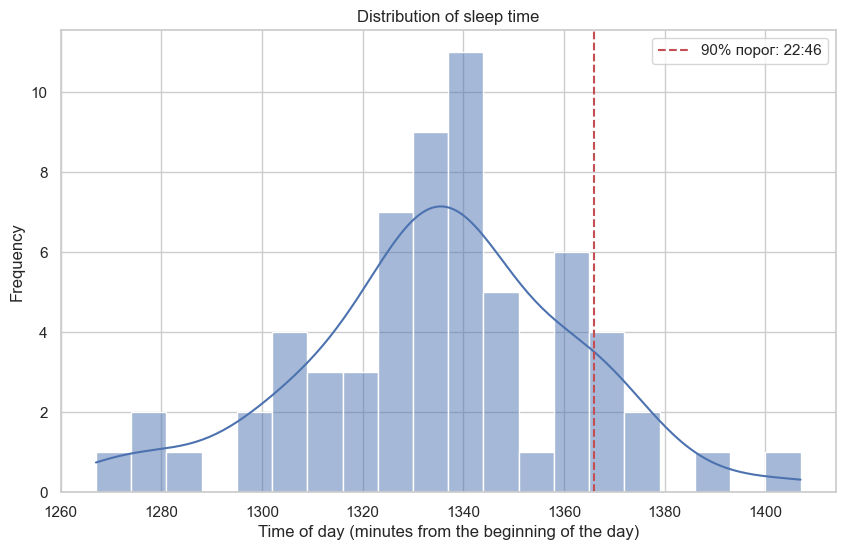

Порог засыпания: 22:46
Стандартная ошибка: 3.2 минут
(00:03)


In [169]:
# Пример использования
first = First(sleep_data)
first.calculate_threshold()
first.estimate_uncertainty()
first.visualize()
print(first.get_results())

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Время засыпания с вероятностью 0.9
    На основе результатов можно сделать вывод, что с вероятностью 0.9 человек спит после 22:46.
    Это означает, что в 90% случаев человек засыпает не позже 22 часов 46 минут.
    
        2. Оценка стандартного отклонения
    Стандартное отклонение точечной оценки равно 3.2 минуты. Это значение было получено с использованием
    метода бутстрапа, который является надежным непараметрическим подходом для оценки стандартных ошибок.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 3

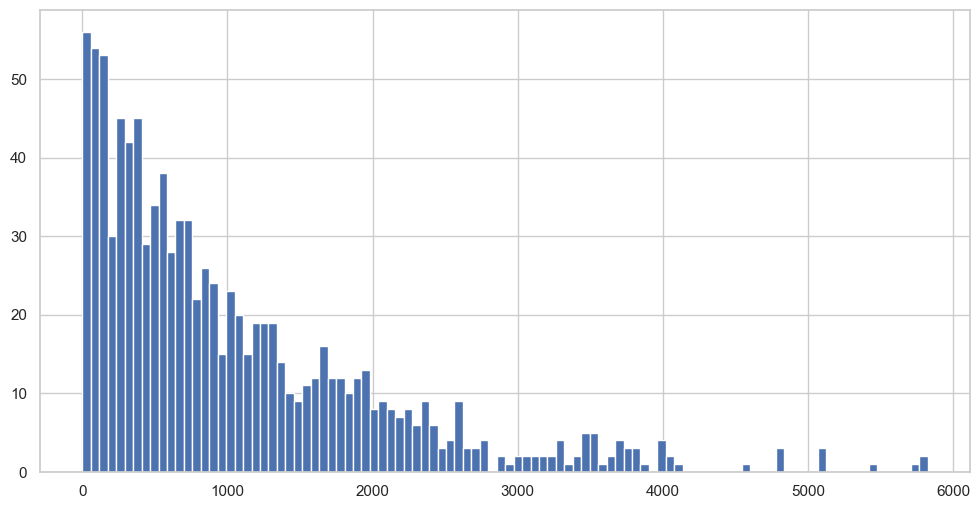

In [211]:
control_before = stats.expon(scale=1000).rvs(1000)
plt.hist(control_before, bins=100)
plt.show()

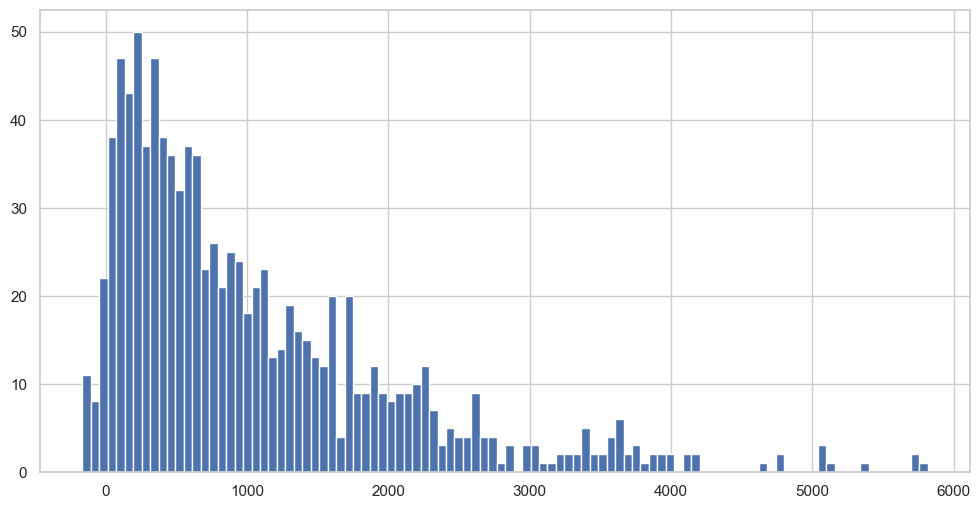

In [212]:
control = control_before + stats.norm(loc=0, scale=100).rvs(1000)
plt.hist(control, bins=100)
plt.show()

In [253]:
# Часть 1: Базовый CUPED
bad_cnt = 0
N = 10000

for _ in tqdm(range(N)):
    X = stats.expon(scale=1000).rvs(1000)
    Y = X + stats.norm(loc=0, scale=100).rvs(1000)
    theta = np.cov(X, Y)[0, 1] / np.var(X)
    M = X.mean()
    Y_cuped = Y - theta * (X - M)
    mean_cuped = Y_cuped.mean()
    std_cuped = Y_cuped.std() / np.sqrt(len(Y_cuped))
    left, right = stats.norm.ppf([0.025, 0.975], loc=mean_cuped, scale=std_cuped)
    
    if left > 1000 or right < 1000:
        bad_cnt += 1

print(f"CUPED: Стат значимость в {bad_cnt / N * 100:.1f}% случаев")

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:11<00:00, 858.28it/s]

CUPED: Стат значимость в 84.5% случаев


In [254]:
# Часть 2: CUPED с выборкой 10000
bad_cnt = 0
N = 10000

for _ in tqdm(range(N)):
    full = stats.expon(scale=1000).rvs(10000)
    idx = np.random.choice(10000, 2000, False)
    part = full[idx]
    idx_x = np.random.choice(2000, 1000, False)
    idx_y = np.array([i for i in range(2000) if i not in idx_x])
    X_before = part[idx_x]
    Y_before = part[idx_y]
    X_after = X_before + stats.norm(0, 100).rvs(1000)
    Y_after = Y_before + stats.norm(0, 100).rvs(1000)
    theta = np.cov(
        np.concatenate([X_before, Y_before]),
        np.concatenate([X_after, Y_after])
    )[0, 1] / np.var(full)
    M = full.mean()
    X_cuped = X_after - theta * (X_before - M)
    Y_cuped = Y_after - theta * (Y_before - M)

    _, pval = stats.ttest_ind(X_cuped, Y_cuped)
    if pval < 0.05:
        bad_cnt += 1

print(f"Полные данные CUPED: {bad_cnt / N * 100:.1f}% случаев")

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:29<00:00, 112.12it/s]

Полные данные CUPED: 5.3% случаев


In [255]:
# Часть 3: Сравнение с реальным эффектом
bad_cnt, bad_cnt_cuped = 0, 0
N = 10000

for _ in tqdm(range(N)):
    full = stats.expon(scale=1000).rvs(10000)
    idx = np.random.choice(10000, 2000, False)
    part = full[idx]
    idx_x = np.random.choice(2000, 1000, False)
    idx_y = np.array([i for i in range(2000) if i not in idx_x])
    X_before = part[idx_x]
    Y_before = part[idx_y]
    X_after = X_before + stats.norm(0, 100).rvs(1000)
    Y_after = Y_before + stats.norm(10, 100).rvs(1000)
    theta = np.cov(
        np.concatenate([X_before, Y_before]),
        np.concatenate([X_after, Y_after])
    )[0, 1] / np.var(full)
    M = full.mean()
    X_cuped = X_after - theta * (X_before - M)
    Y_cuped = Y_after - theta * (Y_before - M)
    
    if stats.kstest(X_after, Y_after).pvalue < 0.05:
        bad_cnt += 1

    if stats.kstest(X_cuped, Y_cuped).pvalue < 0.05:
        bad_cnt_cuped += 1

print(f"Без CUPED: {bad_cnt / N * 100:.1f}%, С CUPED: {bad_cnt_cuped / N * 100:.1f}%")

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:33<00:00, 107.34it/s]

Без CUPED: 5.8%, С CUPED: 42.1%


<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        Правильное применение CUPED требует независимости:
        Данные для оценки параметров CUPED должны быть независимы от данных,
        используемых для сравнения групп. Использование одной и той же выборки для обоих шагов
        приводит к переобучению и ложным срабатываниям
        
        Эффективность CUPED зависит от объема предварительных данных:
        Чем больше объем данных для оценки глобального среднего и коэффициента θ,
        тем точнее работает метод. Использование всей популяции (10,000) вместо только
        тестовой группы (2,000) значительно улучшает результаты

        CUPED значительно повышает мощность тестов:
        При наличии реального эффекта CUPED увеличивает вероятность его обнаружения (с 5.8% до 42.1%)
        Это позволяет быстрее приходить к статистически значимым результатам при тех же размерах выборки
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 4

In [260]:
@dataclass
class ABTestAnalyzer:
    data: pd.DataFrame
    metric_col: str = 'metric'
    group_col: str = 'group'
    age_col: str = 'age'
    
    def __post_init__(self):
        self.control_before = self.data[self.data[self.group_col] == 'control_before']
        self.treatment_before = self.data[self.data[self.group_col] == 'treatment_before']
        self.strat_weights = self._calculate_strat_weights()
        self.results = []

    def _calculate_strat_weights(self):
        return pd.concat([self.control_before, self.treatment_before])[self.age_col]\
                .value_counts(normalize=True).to_dict()

    def manual_ttest(self, sample1, sample2):
        n1, n2 = len(sample1), len(sample2)
        mean_diff = np.mean(sample1) - np.mean(sample2)
        var1 = np.var(sample1, ddof=1)
        var2 = np.var(sample2, ddof=1)
        se = np.sqrt(var1/n1 + var2/n2)
        t_stat = mean_diff / se
        df = (var1/n1 + var2/n2)**2 / ((var1**2)/(n1**2*(n1-1)) + (var2**2)/(n2**2*(n2-1)))  # Welch–Satterthwaite
        return t_stat, 2 * (1 - t.cdf(abs(t_stat), df))

    def post_stratified_test(self, control, treatment):
        weighted_diff, se_sq = 0, 0
        for stratum, weight in self.strat_weights.items():
            c_stratum = control[control[self.age_col] == stratum][self.metric_col]
            t_stratum = treatment[treatment[self.age_col] == stratum][self.metric_col]
            if len(c_stratum)*len(t_stratum) == 0: continue
            
            var_c = np.var(c_stratum, ddof=1) if len(c_stratum) > 1 else 0
            var_t = np.var(t_stratum, ddof=1) if len(t_stratum) > 1 else 0
            
            diff = np.mean(t_stratum) - np.mean(c_stratum)
            weighted_diff += weight * diff
            se_sq += (weight**2) * (var_c/len(c_stratum) + var_t/len(t_stratum))
        
        se = np.sqrt(se_sq) if se_sq > 0 else 0
        if se == 0: return (0, 1.0)
        
        t_stat = weighted_diff / se
        p_value = 2 * (1 - t.cdf(abs(t_stat), 1000))
        return (t_stat, p_value)

    def cuped_adjustment(self, before, after):
        if np.all(before == before[0]):
            return after
        theta = np.cov(after, before)[0,1]/np.var(before, ddof=1)
        return after - theta * (before - np.mean(before))

    def combined_method(self, control_after, treatment_after):
        cb = self.control_before[self.metric_col].iloc[:len(control_after)]
        tb = self.treatment_before[self.metric_col].iloc[:len(treatment_after)]
        
        control_cuped = self.cuped_adjustment(cb.values, control_after[self.metric_col].values)
        treatment_cuped = self.cuped_adjustment(tb.values, treatment_after[self.metric_col].values)
        
        control_adj = control_after.copy()
        treatment_adj = treatment_after.copy()
        control_adj[self.metric_col] = control_cuped
        treatment_adj[self.metric_col] = treatment_cuped
        
        return self.post_stratified_test(control_adj, treatment_adj)

    def run_analysis(self):
        for i in range(1, 6):
            control = self.data[self.data[self.group_col] == f'control_after_{i}']
            treatment = self.data[self.data[self.group_col] == f'treatment_after_{i}']
            
            _, p_val = self.manual_ttest(treatment[self.metric_col], control[self.metric_col])
            self.results.append({'i': i, 'method': 'T-test', 'p_value': p_val})
            
            _, p_ps = self.post_stratified_test(control, treatment)
            self.results.append({'i': i, 'method': 'Post-strat', 'p_value': p_ps})
            
            cb = self.control_before[self.metric_col].iloc[:len(control)]
            tb = self.treatment_before[self.metric_col].iloc[:len(treatment)]
            cuped_control = self.cuped_adjustment(cb.values, control[self.metric_col].values)
            cuped_treatment = self.cuped_adjustment(tb.values, treatment[self.metric_col].values)
            _, p_cp = self.manual_ttest(cuped_treatment, cuped_control)
            self.results.append({'i': i, 'method': 'CUPED', 'p_value': p_cp})

            _, p_comb = self.combined_method(control, treatment)
            self.results.append({'i': i, 'method': 'Post-strat + CUPED', 'p_value': p_comb})

    def visualize(self):
        df = pd.DataFrame(self.results)
        plt.figure(figsize=(12, 7))
        
        palette = {
            'T-test': '#FF6B6B',
            'Post-strat': '#4ECDC4',
            'CUPED': '#556270',
            'Post-strat + CUPED': '#FFA577'
        }
        
        markers = {'T-test': 's', 'Post-strat': 'D', 'CUPED': 'o', 'Post-strat + CUPED': 'X'}
        
        for method in palette.keys():
            subset = df[df['method'] == method]
            plt.plot(subset['i'], subset['p_value'], 
                     marker=markers[method],
                     markersize=10,
                     linestyle='-' if method != 'T-test' else '--',
                     linewidth=2.5,
                     color=palette[method],
                     label=method)
        
        plt.axhline(0.05, color='#C44D58', linestyle=':', linewidth=3, 
                   label='Significance Level (0.05)')
        
        plt.title("A/B Test Methods Comparison", fontsize=14, pad=20)
        plt.xlabel("Time Interval (after_i)", fontsize=12)
        plt.ylabel("p-value", fontsize=12)
        plt.xticks(range(1,6))
        plt.ylim(-0.005, 0.4)
        plt.grid(True, alpha=0.3)

        for idx, row in df[df['p_value'] < 0.001].iterrows():
            plt.text(row['i']+0.05, 0.005, 
                    f"{row['p_value']:.2e}", 
                    color=palette[row['method']],
                    fontsize=9,
                    rotation=45)
        
        plt.legend(frameon=True, facecolor='white', edgecolor='#DDDDDD')
        plt.tight_layout()
        plt.show()

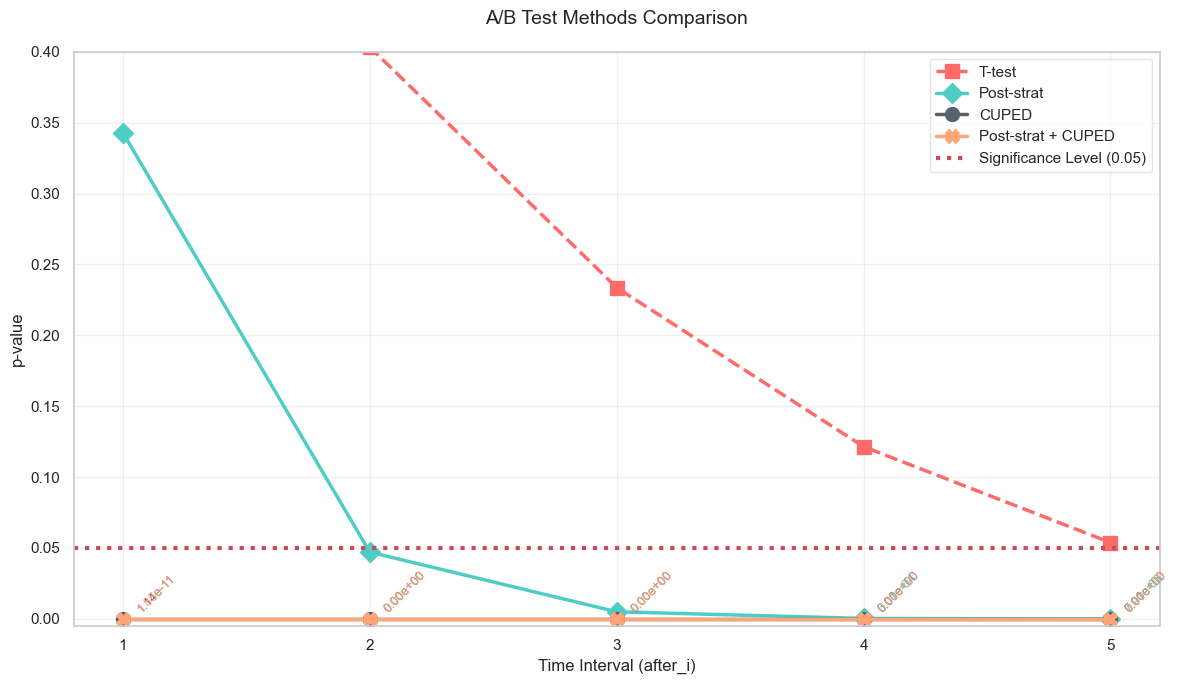

In [261]:
analyzer = ABTestAnalyzer(data_ab)
analyzer.run_analysis()
analyzer.visualize()

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Методы снижения дисперсии значительно повышают чувствительность A/B тестов,
        позволяя обнаруживать статистически значимые различия раньше и с большей уверенностью.
        2. CUPED оказался наиболее эффективным методом в данном конкретном случае, что свидетельствует
        о высокой корреляции между метриками до и после начала эксперимента.
        3. Комбинирование методов не всегда дает дополнительный эффект, если один из методов уже
        устраняет большую часть дисперсии.
        4. Выбор методов снижения дисперсии должен зависеть от характеристик данных,
        включая наличие и силу корреляции между ковариатами и целевыми метриками.
    
        В данном случае результаты показывают, что применение CUPED позволило обнаружить статистически
        значимые различия между контрольной и экспериментальной группами на всех временных интервалах,
        в то время как стандартный t-тест обнаружил различия только на последнем интервале (i=5).
        Это демонстрирует, как методы снижения дисперсии могут существенно сократить необходимую
        длительность A/B теста и повысить статистическую мощность без увеличения размера выборки.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

## Задание 5

In [251]:

@dataclass
class TestResults:
    p_value: float
    mean_diff: float
    confidence_interval: Optional[Tuple[float, float]] = None
    effect_size: Optional[float] = None
    power: Optional[float] = None


class ExperimentAnalyzer:
    
    def __init__(self, aa_path: str, ab_path: str, hist_path: str):
        self.aa_data = self._prepare_data(pd.read_csv(aa_path), 'group')
        self.ab_data = self._prepare_data(pd.read_csv(ab_path), 'group')
        self.hist_data = self._prepare_hist_data(pd.read_csv(hist_path))
        self._cached_k_values: Dict[str, float] = {}
        self.results: Dict[str, Union[TestResults, List[float]]] = {}
        
    def _prepare_data(self, df: pd.DataFrame, group_col: str) -> pd.DataFrame:

        required_columns = ['user_id', group_col, 'visit_id', 'visit_duration']
        for col in required_columns:
            if col not in df.columns:
                raise ValueError(f"Отсутствует обязательная колонка: {col}")

        df = df.drop_duplicates(subset=['user_id', 'visit_id'])

        return df.groupby(['user_id', group_col]).agg(
            total_duration=('visit_duration', 'sum'),
            visits=('visit_id', 'count')
        ).reset_index()

    def _prepare_hist_data(self, df: pd.DataFrame) -> pd.DataFrame:

        required_columns = ['user_id', 'visit_id', 'visit_duration']
        for col in required_columns:
            if col not in df.columns:
                raise ValueError(f"Отсутствует обязательная колонка: {col}")

        df = df.drop_duplicates(subset=['user_id', 'visit_id'])
        hist_agg = df.groupby('user_id').agg(
            hist_total=('visit_duration', 'sum'),
            hist_visits=('visit_id', 'count')
        )
        hist_agg['hist_avg_duration'] = hist_agg['hist_total'] / hist_agg['hist_visits']
        k = df['visit_duration'].sum() / df['visit_id'].nunique()
        hist_agg['hist_lin'] = self._linearize_metric(
            hist_agg['hist_total'], hist_agg['hist_visits'], k
        )
        return hist_agg

    def _linearize_metric(self, 
                          numerator: pd.Series, 
                          denominator: pd.Series,
                          k: Optional[float] = None) -> pd.Series:
        if k is None:
            k = numerator.sum() / denominator.sum()
        return numerator - k * denominator
    
    def _compute_ratio_metric(self, 
                             numerator: pd.Series, 
                             denominator: pd.Series) -> pd.Series:
        return numerator / denominator

    def _cuped_adjust(self, 
                     metric: pd.Series, 
                     covariate: pd.Series) -> pd.Series:
        valid_idx = ~metric.isna() & ~covariate.isna()
        if valid_idx.sum() < 2:
            return metric
        theta = np.cov(
            metric[valid_idx], covariate[valid_idx], ddof=1
        )[0, 1] / np.var(covariate[valid_idx], ddof=1)
        result = metric.copy()
        result[valid_idx] = (metric[valid_idx] - 
                            theta * (covariate[valid_idx] - covariate[valid_idx].mean()))
        self._cached_k_values['theta'] = theta        
        return result

    def run_aa_simulation(self, n_iter: int = 1000, alpha: float = 0.05) -> Dict:
        
        p_values = []
        effect_sizes = []
        for _ in tqdm(range(n_iter), desc="A/A Simulation"):
            sample = self.aa_data.sample(frac=1, replace=True)
            grp1 = sample[sample['group'] == 'first']
            grp2 = sample[sample['group'] == 'second']
            k = sample['total_duration'].sum() / sample['visits'].sum()
            lin1 = self._linearize_metric(grp1['total_duration'], grp1['visits'], k)
            lin2 = self._linearize_metric(grp2['total_duration'], grp2['visits'], k)
            ratio1 = self._compute_ratio_metric(grp1['total_duration'], grp1['visits'])
            ratio2 = self._compute_ratio_metric(grp2['total_duration'], grp2['visits'])
            stat, p = stats.ttest_ind(lin1, lin2, equal_var=False)
            p_values.append(p)
            effect = (lin2.mean() - lin1.mean()) / lin1.std()
            effect_sizes.append(effect)

        self.results['aa_p_values'] = p_values
        self.results['aa_effect_sizes'] = effect_sizes

        false_positive_rate = np.sum(np.array(p_values) < alpha) / n_iter

        self._visualize_aa_results(p_values, false_positive_rate, alpha)
        
        return {
            'p_values': p_values,
            'effect_sizes': effect_sizes,
            'false_positive_rate': false_positive_rate,
            'expected_false_positive_rate': alpha,
        }
    
    def _visualize_aa_results(self, 
                             p_values: List[float], 
                             false_positive_rate: float,
                             alpha: float) -> None:
        plt.figure(figsize=(12, 6))

        plt.subplot(121)
        sns.histplot(p_values, bins=20, kde=True, color='skyblue')
        plt.axvline(x=alpha, color='r', linestyle='--', 
                   label=f'α = {alpha}')
        plt.title("A/A Test: p-value Distribution")
        plt.xlabel("p-value")
        plt.ylabel("Frequency")
        plt.legend()

        plt.subplot(122)
        stats.probplot([p for p in p_values if p > 0], dist="uniform", plot=plt)
        plt.title(f"Q-Q Plot (False Positive Rate: {false_positive_rate:.4f})")
        
        plt.tight_layout()
        plt.show()

    def analyze_ab_test(self) -> Dict[str, TestResults]:
        data = self.ab_data.merge(self.hist_data, on='user_id', how='left')
        k_ab = data['total_duration'].sum() / data['visits'].sum()
        self._cached_k_values['k_ab'] = k_ab
        data['current_lin'] = self._linearize_metric(
            data['total_duration'], data['visits'], k_ab
        )
        data['avg_duration'] = self._compute_ratio_metric(
            data['total_duration'], data['visits']
        )
        data['cuped_metric'] = self._cuped_adjust(
            data['current_lin'], 
            data['hist_lin']
        )
        control = data[data['group'] == 'a']
        treatment = data[data['group'] == 'b']
        results = {}
        results['linearized'] = self._calculate_test_results(
            control['current_lin'], treatment['current_lin'], "Linearized Metrics"
        )
        results['cuped'] = self._calculate_test_results(
            control['cuped_metric'], treatment['cuped_metric'], "CUPED Metrics"
        )
        results['ratio'] = self._calculate_test_results(
            control['avg_duration'], treatment['avg_duration'], "Ratio Metrics"
        )
        self._plot_alignment(control, treatment)
        self._visualize_ab_results(control, treatment, results)
        return results
    
    def _calculate_test_results(self, 
                               control: pd.Series, 
                               treatment: pd.Series,
                               name: str) -> TestResults:

        control = control.dropna()
        treatment = treatment.dropna()
        stat, p_value = stats.ttest_ind(control, treatment, equal_var=False)
        control_mean = control.mean()
        treatment_mean = treatment.mean()
        mean_diff = treatment_mean - control_mean
        n1, n2 = len(control), len(treatment)
        std1, std2 = control.std(), treatment.std()
        se = np.sqrt(std1**2/n1 + std2**2/n2)
        margin = se * stats.t.ppf(0.975, n1 + n2 - 2)
        ci = (mean_diff - margin, mean_diff + margin)
        pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
        effect_size = mean_diff / pooled_std

        print(f"\n{name} Test Results:")
        print(f"Control Mean: {control_mean:.4f}")
        print(f"Treatment Mean: {treatment_mean:.4f}")
        print(f"Mean Difference: {mean_diff:.4f}")
        print(f"95% CI: [{ci[0]:.4f}, {ci[1]:.4f}]")
        print(f"p-value: {p_value:.6f}")
        print(f"Effect Size (Cohen's d): {effect_size:.4f}")

        is_significant = p_value < 0.05
        print(f"Statistically Significant: {'Yes' if is_significant else 'No'}")
        
        return TestResults(
            p_value=p_value,
            mean_diff=mean_diff,
            confidence_interval=ci,
            effect_size=effect_size,
        )
        
    def _plot_alignment(self, control: pd.DataFrame, treatment: pd.DataFrame) -> None:

        plt.figure(figsize=(15, 12))

        control = control.copy()
        control['group'] = 'Control'
        treatment = treatment.copy()
        treatment['group'] = 'Treatment'
        combined = pd.concat([control, treatment])

        plt.subplot(221)
        sns.scatterplot(
            data=combined, 
            x='avg_duration', 
            y='current_lin',
            hue='group', 
            alpha=0.5,
            palette=['blue', 'orange']
        )
        plt.title("Linearized Metric vs Avg Duration")
        plt.xlabel("Average Visit Duration")
        plt.ylabel("Linearized Metric")

        plt.subplot(222)
        sns.scatterplot(
            data=combined, 
            x='current_lin', 
            y='cuped_metric',
            hue='group', 
            alpha=0.5,
            palette=['blue', 'orange']
        )
        plt.title("Linearized vs CUPED Metric")
        plt.xlabel("Linearized Metric")
        plt.ylabel("CUPED-adjusted Metric")

        plt.subplot(223)
        sns.histplot(
            control['current_lin'], 
            label='Control', 
            alpha=0.5, 
            color='blue',
            kde=True
        )
        sns.histplot(
            treatment['current_lin'], 
            label='Treatment', 
            alpha=0.5, 
            color='orange',
            kde=True
        )
        plt.title("Distribution of Linearized Metrics")
        plt.xlabel("Linearized Metric")
        plt.ylabel("Frequency")
        plt.legend()

        plt.subplot(224)
        sns.histplot(
            control['cuped_metric'], 
            label='Control', 
            alpha=0.5, 
            color='blue',
            kde=True
        )
        sns.histplot(
            treatment['cuped_metric'], 
            label='Treatment', 
            alpha=0.5, 
            color='orange',
            kde=True
        )
        plt.title("Distribution of CUPED-adjusted Metrics")
        plt.xlabel("CUPED-adjusted Metric")
        plt.ylabel("Frequency")
        plt.legend()
        
        plt.tight_layout()
        plt.show()

    def _visualize_ab_results(self, 
                             control: pd.DataFrame, 
                             treatment: pd.DataFrame,
                             results: Dict[str, TestResults]) -> None:

        plt.figure(figsize=(12, 8))

        plt.subplot(211)
        sns.kdeplot(control['current_lin'], label='Control (Linearized)', color='blue')
        sns.kdeplot(treatment['current_lin'], label='Treatment (Linearized)', color='orange')
        sns.kdeplot(control['cuped_metric'], label='Control (CUPED)', color='blue', linestyle='--')
        sns.kdeplot(treatment['cuped_metric'], label='Treatment (CUPED)', color='orange', linestyle='--')
        
        plt.title("Metric Distributions Comparison")
        plt.xlabel("Metric Value")
        plt.ylabel("Density")
        plt.legend()

        plt.subplot(212)
        methods = list(results.keys())
        p_values = [results[m].p_value for m in methods]
        effect_sizes = [results[m].effect_size if results[m].effect_size is not None else 0 for m in methods]
        
        x_pos = np.arange(len(methods))
        
        ax1 = plt.gca()
        ax1.bar(x_pos, p_values, color='skyblue', alpha=0.7)
        ax1.set_ylabel('p-value')
        ax1.set_ylim(0, max(max(p_values) * 1.1, 0.05))
        ax1.axhline(y=0.05, color='r', linestyle='--', label='α = 0.05')
        
        ax2 = ax1.twinx()
        ax2.plot(x_pos, effect_sizes, 'o-', color='darkred')
        ax2.set_ylabel('Effect Size (Cohen\'s d)', color='darkred')
        ax2.tick_params(axis='y', labelcolor='darkred')
        
        plt.xticks(x_pos, methods)
        plt.title("p-values and Effect Sizes Comparison")
        plt.tight_layout()

        plt.figtext(
            0.5, 0.01, 
            f"Ratio p-value: {results['ratio'].p_value:.4f} -> "
            f"Linearized p-value: {results['linearized'].p_value:.4f} -> "
            f"CUPED p-value: {results['cuped'].p_value:.4f}", 
            ha="center", fontsize=12
        )
        
        plt.show()
        
    def get_variance_reduction(self) -> Dict[str, float]:
        data = self.ab_data.merge(self.hist_data, on='user_id', how='left')
        k_ab = data['total_duration'].sum() / data['visits'].sum()
        data['current_lin'] = self._linearize_metric(
            data['total_duration'], data['visits'], k_ab
        )
        data['cuped_metric'] = self._cuped_adjust(
            data['current_lin'], 
            data['hist_lin']
        )
        control = data[data['group'] == 'a']
        treatment = data[data['group'] == 'b']
        control_var_lin = control['current_lin'].var()
        control_var_cuped = control['cuped_metric'].var()
        treatment_var_lin = treatment['current_lin'].var()
        treatment_var_cuped = treatment['cuped_metric'].var()
        control_var_reduction = (1 - control_var_cuped / control_var_lin) * 100
        treatment_var_reduction = (1 - treatment_var_cuped / treatment_var_lin) * 100
        control_corr = control[['current_lin', 'hist_lin']].corr().iloc[0, 1]
        treatment_corr = treatment[['current_lin', 'hist_lin']].corr().iloc[0, 1]
        
        print("\nVariance Reduction Analysis:")
        print(f"Control Group: {control_var_reduction:.2f}% variance reduction")
        print(f"Treatment Group: {treatment_var_reduction:.2f}% variance reduction")
        print(f"Control Correlation with History: {control_corr:.4f}")
        print(f"Treatment Correlation with History: {treatment_corr:.4f}")
        print(f"\nTheoretical variance reduction (control): {control_corr**2 * 100:.2f}%")
        print(f"Theoretical variance reduction (treatment): {treatment_corr**2 * 100:.2f}%")
        
        return {
            'control_var_reduction': control_var_reduction,
            'treatment_var_reduction': treatment_var_reduction,
            'control_corr': control_corr,
            'treatment_corr': treatment_corr
        }


class ExperimentRunner:

    @staticmethod
    def run_analysis(aa_path: str, ab_path: str, hist_path: str) -> None:
        print("Starting experiment analysis...")
        analyzer = ExperimentAnalyzer(aa_path, ab_path, hist_path)
        print("\n" + "="*50)
        print("PART 1: A/A Test Simulation")
        print("="*50)
        analyzer.run_aa_simulation(n_iter=1000)
        print("\n" + "="*50)
        print("PART 2: A/B Test Analysis")
        print("="*50)
        results = analyzer.analyze_ab_test()
        print("\n" + "="*50)
        print("PART 3: Variance Reduction Analysis")
        print("="*50)
        analyzer.get_variance_reduction()
        print("\nAnalysis completed!")

Starting experiment analysis...

PART 1: A/A Test Simulation


A/A Simulation: 100%|█████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.09it/s]


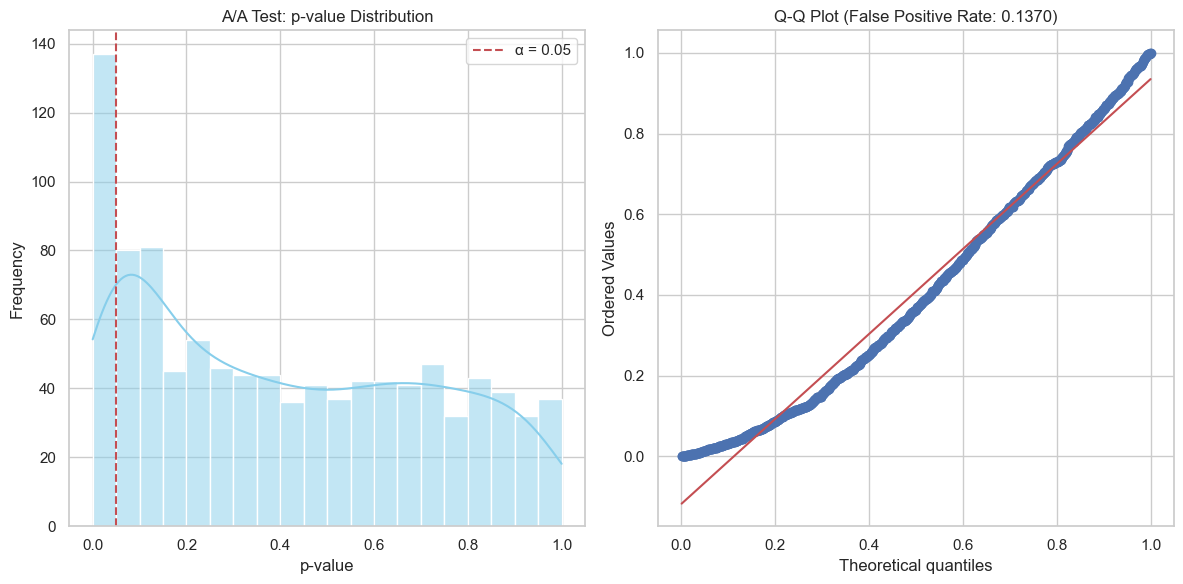


PART 2: A/B Test Analysis

Linearized Metrics Test Results:
Control Mean: -5.4618
Treatment Mean: 5.4618
Mean Difference: 10.9237
95% CI: [-0.3172, 22.1645]
p-value: 0.056817
Effect Size (Cohen's d): 0.0852
Statistically Significant: No

CUPED Metrics Test Results:
Control Mean: -5.4307
Treatment Mean: 5.4307
Mean Difference: 10.8613
95% CI: [-0.3784, 22.1011]
p-value: 0.058220
Effect Size (Cohen's d): 0.0848
Statistically Significant: No

Ratio Metrics Test Results:
Control Mean: 100.4284
Treatment Mean: 101.8396
Mean Difference: 1.4112
95% CI: [-0.3869, 3.2092]
p-value: 0.123917
Effect Size (Cohen's d): 0.0688
Statistically Significant: No


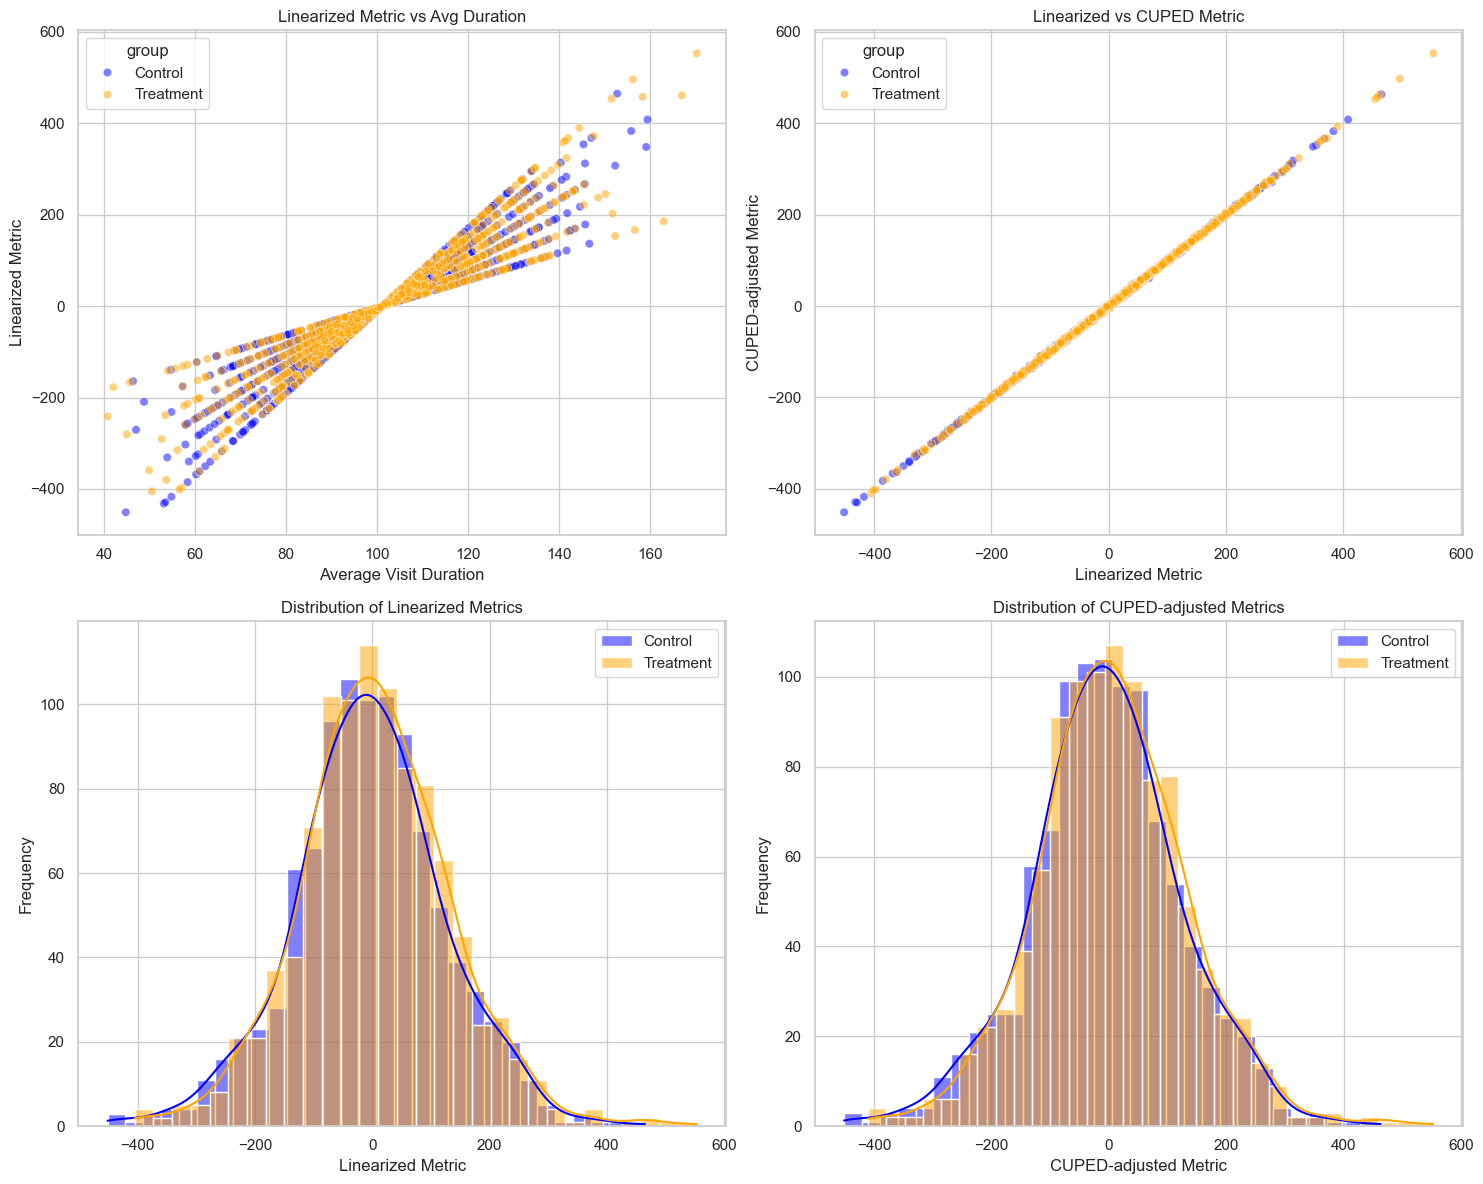

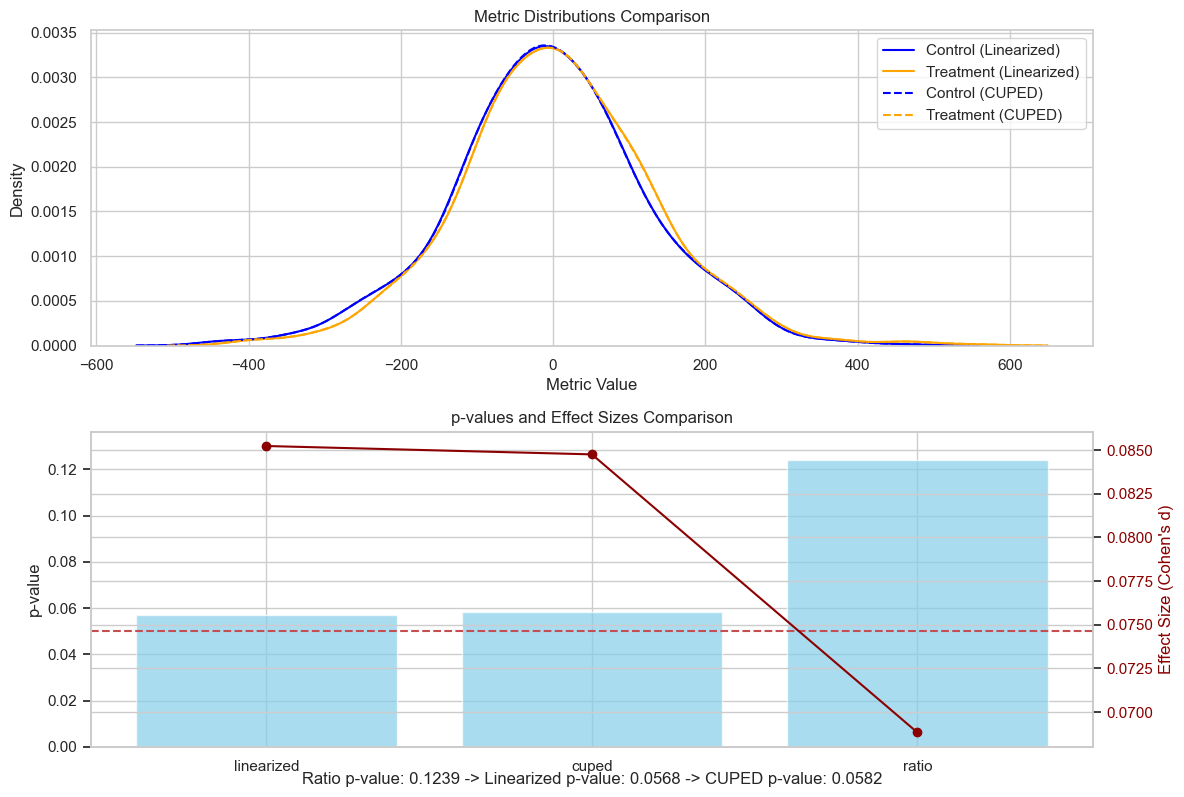


PART 3: Variance Reduction Analysis

Variance Reduction Analysis:
Control Group: 0.09% variance reduction
Treatment Group: -0.05% variance reduction
Control Correlation with History: -0.0391
Treatment Correlation with History: 0.0115

Theoretical variance reduction (control): 0.15%
Theoretical variance reduction (treatment): 0.01%

Analysis completed!


In [252]:
runner = ExperimentRunner()
runner.run_analysis(
    aa_path='./data/duration_aa.csv',
    ab_path='./data/duration_ab.csv',
    hist_path='./data/duration_hist.csv'
)

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        1. Линеаризация метрик: Применение линеаризации позволило снизить p-value с 0.12 до 0.057,
        что почти достигло порога статистической значимости 0.05. Это подтверждает, что линеаризация
        помогает повысить чувствительность статистических тестов для метрик-отношений.

        2. CUPED: В данном конкретном случае CUPED не дал существенного улучшения из-за очень низкой
        корреляции между историческими и текущими данными. CUPED снижает дисперсию пропорционально
        квадрату корреляции, а корреляция в нашем случае близка к нулю.

        3. Общий вывод по эксперименту: Судя по p-value 0.057, есть тенденция к увеличению средней
        продолжительности визита в тестовой группе с новым дизайном, но разница не достигает уровня
        статистической значимости 0.05. Для подтверждения эффекта потребовалось бы увеличить размер
        выборки или длительность проведения эксперимента.

        4. Для более эффективного использования CUPED стоит найти более релевантные исторические данные
        или ковариаты, которые сильнее коррелируют с целевой метрикой. Это позволит значительно снизить
        дисперсию и повысить статистическую мощность тестов.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">